In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [5]:
### Part 1: Understanding Product Categories

#Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?



#1. **Frequency Tables**:
    #- Generate a frequency table for the product `category`.
    #- Which are the top 5 most listed product categories?

                                  TotalBoughtLastMonth
category                                              
Health & Personal Care                         9626950
Grocery                                        8442550
Beauty                                         7052400
Pet Supplies                                   3231650
Baby                                           2635150
Hair Care                                      2102550
Skin Care                                      2098050
Arts & Crafts                                  1934350
Storage & Organisation                         1814350
Office Supplies                                1317500
Bath & Body                                    1148700
Make-up                                        1048950
Gardening                                       990150
Office Paper Products                           933300
Manicure & Pedicure Products                    713500
Sports & Outdoors                               696500
Pens, Penc

<Figure size 1200x800 with 0 Axes>

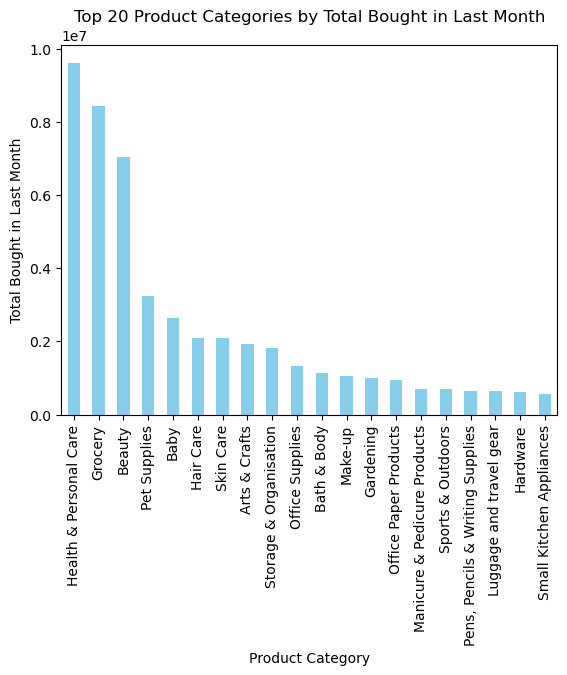

In [6]:

### Part 1: Understanding Product Categories

#Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?
# Most popular product categories are: Health and personal care, Grocery, Beauty, Pet Supplies and Baby. 
#Health and personal care, Grocery,  Pet Supplies and Baby, Arts & Crafts,Storage & Organisation or Office Supplies are  the top most popular categories, but none of those correlate the the number of top listings.
# Only beauty, hair care and skin care are allign, in terms of being in the top sellers and the top listings at the same time.

category_df = df[["category", 'boughtInLastMonth']]


category_summary = pd.pivot_table(category_df, index=['category'], aggfunc='sum')
category_summary.rename(columns={"boughtInLastMonth": "TotalBoughtLastMonth"}, inplace=True)
category_summary_sorted = category_summary.sort_values(by='TotalBoughtLastMonth', ascending=False)
top_20_categories = category_summary_sorted.head(20)
print(top_20_categories)



plt.figure(figsize=(12, 8))
top_20_categories.plot(kind='bar', legend=False, color='skyblue')
plt.title('Top 20 Product Categories by Total Bought in Last Month')
plt.xlabel('Product Category')
plt.ylabel('Total Bought in Last Month')
plt.xticks(rotation=90)
plt.show()

In [7]:
#1.1 **Frequency Tables**:
    #- Generate a frequency table for the product `category`.
    #- Which are the top 5 most listed product categories?
category_frequency = df['category'].value_counts()


top_5_categories = category_frequency.head(5)

print("Frequency table for the product category:")
print(category_frequency)

print("\nTop 5 most listed product categories:")
print(top_5_categories)

Frequency table for the product category:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

Top 5 most listed product categories:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


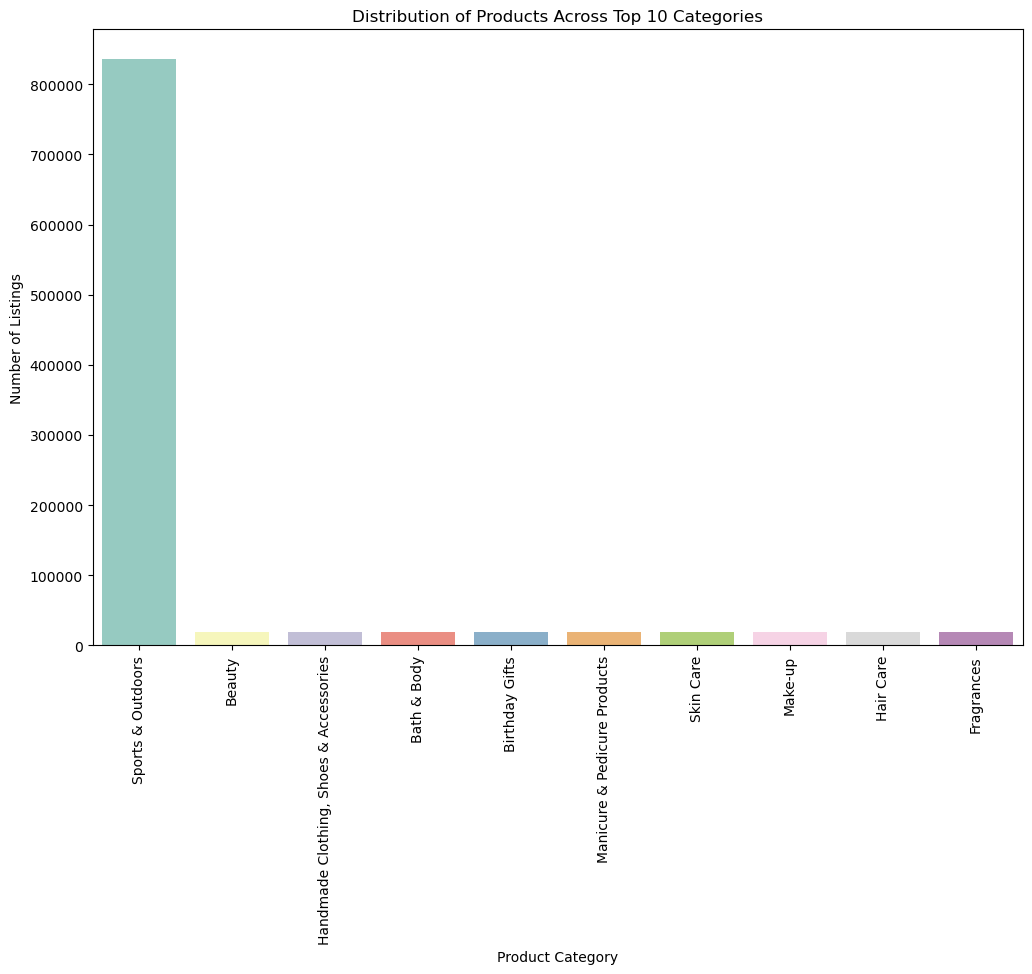

In [8]:
#1.2. **Visualizations**:
    #- Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*

    
category_frequency = df['category'].value_counts()

# top 10 categories
top_categories = category_frequency.head(10)

# distribution of products across the top 10 categories using a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='Set3')
plt.xticks(rotation=90)
plt.xlabel('Product Category')
plt.ylabel('Number of Listings')
plt.title('Distribution of Products Across Top 10 Categories')
plt.show()
    
    

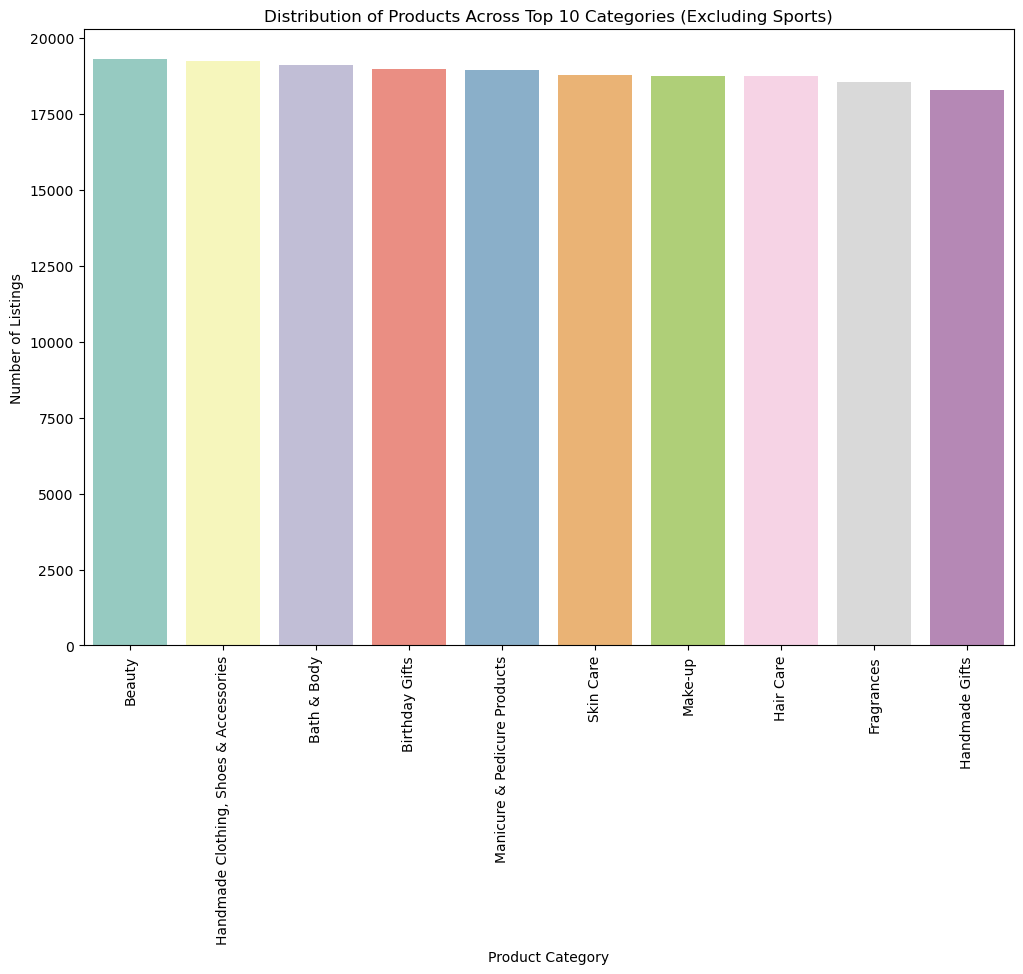

In [9]:

category_frequency = df['category'].value_counts()

# Exclude "Sports"
scategory_frequency = category_frequency[category_frequency.index != 'Sports & Outdoors']
#top 10 categories excluding "Sports"
top_categories = scategory_frequency.head(10)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='Set3')
plt.xticks(rotation=90)
plt.xlabel('Product Category')
plt.ylabel('Number of Listings')
plt.title('Distribution of Products Across Top 10 Categories (Excluding Sports)')
plt.show()


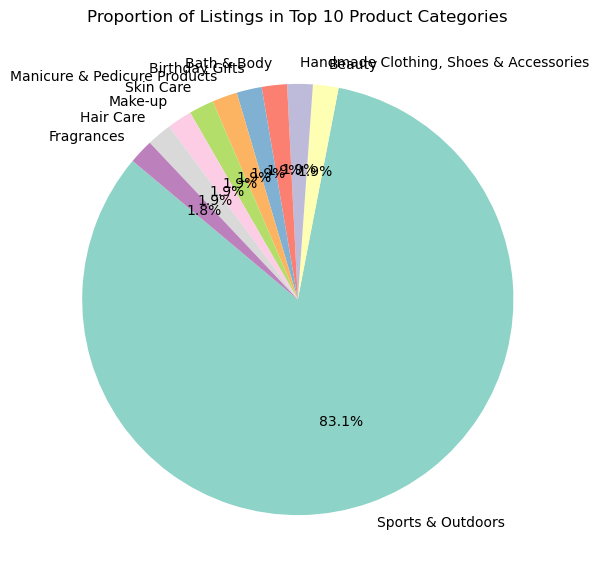

In [10]:
 # For a subset of top categories, visualize their proportions using a pie chart
top_categories = category_frequency.head(10)
plt.figure(figsize=(10, 7))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(top_categories)))
plt.title('Proportion of Listings in Top 10 Product Categories')
plt.show()  
#Does any category dominate the listings? sports and outdoors

Measures of Centrality:
Mean price: 89.24380943923663
Median price: 19.09
Mode price: 9.99

Measures of Dispersion:
Variance of price: 119445.48532256528
Standard deviation of price: 345.60886175352226
Range of price: 100000.0
Interquartile range of price: 36.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


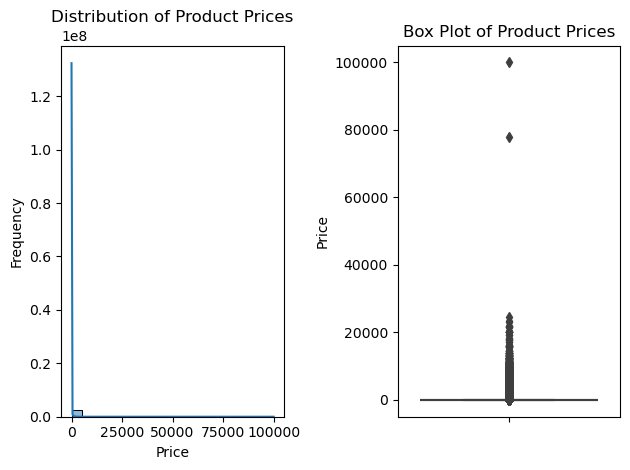

In [28]:
### Part 2: Delving into Product Pricing

#**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

#2.1. **Measures of Centrality**:
    #- Calculate the mean, median, and mode for the `price` of products.
    #- What's the average price point of products listed? How does this compare with the most common price point (mode)?
#The mean price  is significantly higher than the mode price). This suggests that while the most frequently listed products are priced at around 9.99, there are higher-priced products that are driving up the average (outliers).

# Measures of Centrality
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]  # Mode returns a Series, so we access the first value

# Print mean, median, and mode
print("Measures of Centrality:")
print("Mean price:", mean_price)
print("Median price:", median_price)
print("Mode price:", mode_price)

#2.2 **Measures of Dispersion**:
    #- Determine the variance, standard deviation, range, and interquartile range for product `price`.
    #- How varied are the product prices? Are there any indicators of a significant spread in prices?
    #- What's the average price point of products listed? How does this compare with the most common price point (mode)?
#The avg. price is much higher than the mode. This suggests that while the majority of products are priced low, there are some high-priced products that are raising the average price significantly.
#A high variance and a high standard deviation indicate a wide spread of prices around the mean. This means prices are highly varied.    
#The IQR: This is a much smaller spread compared to the overall range, suggesting that while there are extreme values, the majority of prices are more tightly clustered.

variance_price = df['price'].var()
std_dev_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
q1_price = df['price'].quantile(0.25)
q3_price = df['price'].quantile(0.75)
iqr_price = q3_price - q1_price

# Print variance, standard deviation, range, and interquartile range
print("\nMeasures of Dispersion:")
print("Variance of price:", variance_price)
print("Standard deviation of price:", std_dev_price)
print("Range of price:", range_price)
print("Interquartile range of price:", iqr_price)


    
#2.3. **Visualizations**:
    #- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    #- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

 # Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=20, kde=True)
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Box plot 
plt.subplot(1, 2, 2)
sns.boxplot(y='price', data=df)
plt.title("Box Plot of Product Prices")
plt.ylabel("Price")

plt.tight_layout()
plt.show()
       

In [40]:
### Part 3: Unpacking Product Ratings

#**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

#3.1. **Measures of Centrality**:
    #- Calculate the mean, median, and mode for the `rating` of products.
    #- How do customers generally rate products? Is there a common trend?
# Measures of Centrality
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

print("Measures of Centrality:")
print("Mean price:", mean_rating)
print("Median price:", median_rating)
print("Mode price:", mode_rating)
    
#3.2. **Measures of Dispersion**:
    #- Determine the variance, standard deviation, and interquartile range for product `rating`.
    #- Are the ratings consistent, or is there a wide variation in customer feedback?

# Measures of Dispersion
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std() 

print("\nMeasures of Dispersion:")
print("Variance of price:", variance_rating)
print("Standard deviation of price:", std_dev_rating)    
    
#3.3 **Shape of the Distribution**:
    #- Calculate the skewness and kurtosis for the `rating` column. 
    #- Are the ratings normally distributed, or do they lean towards higher or lower values?
# Shape of the Distribution
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()
print("skewness:", skewness_rating)
print("kurtosis:", kurtosis_rating)    
    
   

Measures of Centrality:
Mean price: 2.152836472966065
Median price: 0.0
Mode price: 0.0

Measures of Dispersion:
Variance of price: 4.81743402976196
Standard deviation of price: 2.1948653785054697
skewness: 0.08120735761080985
kurtosis: -1.9260061280432985


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


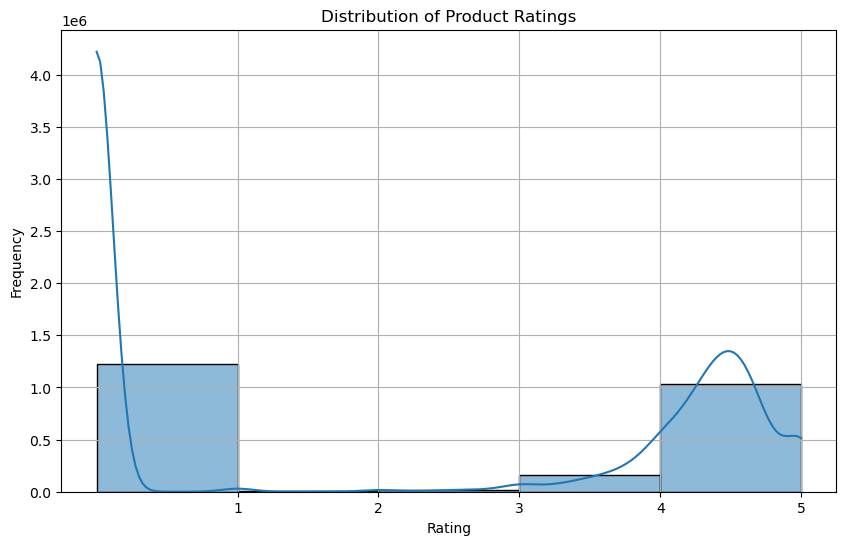

In [42]:
#3.4. **Visualizations**:
    #- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common? 4-5


plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=5, kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))  # Set x-axis ticks from 1 to 5
plt.grid(True)

# Show the plot
plt.show()